<a href="https://colab.research.google.com/github/Sargam-max/Machine_Learning/blob/main/Logistic_Regression_From%20scratch_implimentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0 | Cost: 0.6931
Epoch 100 | Cost: 0.2382
Epoch 200 | Cost: 0.1755
Epoch 300 | Cost: 0.1470
Epoch 400 | Cost: 0.1296
Epoch 500 | Cost: 0.1175
Epoch 600 | Cost: 0.1083
Epoch 700 | Cost: 0.1011
Epoch 800 | Cost: 0.0951
Epoch 900 | Cost: 0.0901

Final Weights: [4.89257407]
Final Bias: 1.9926381631741876
Accuracy: 100.00%


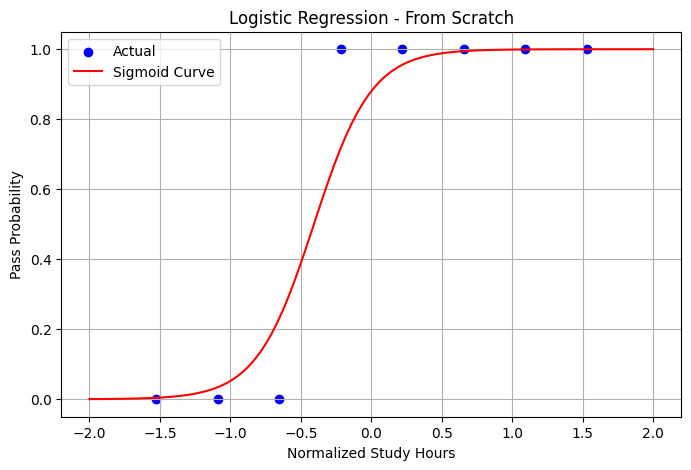

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------
# STEP 1️⃣: Generate Simple Example Data
# --------------------------------------------------
# X: input features (study hours)
# y: labels (0 = fail, 1 = pass)
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8]])
y = np.array([0, 0, 0, 1, 1, 1, 1, 1])

# Normalize data for better training
X = (X - np.mean(X)) / np.std(X)


# --------------------------------------------------
# STEP 2️⃣: Define Sigmoid Function
# --------------------------------------------------
def sigmoid(z):
    """Convert any real value into a range between 0 and 1."""
    return 1 / (1 + np.exp(-z))


# --------------------------------------------------
# STEP 3️⃣: Define Cost Function
# --------------------------------------------------
def compute_cost(y, y_pred):
    """Compute Binary Cross-Entropy Loss"""
    m = len(y)
    cost = - (1/m) * np.sum(
        y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9)
    )
    return cost


# --------------------------------------------------
# STEP 4️⃣: Train Model using Gradient Descent
# --------------------------------------------------
def train(X, y, lr=0.1, epochs=1000):
    m, n = X.shape
    w = np.zeros((n,))   # initialize weights
    b = 0                # initialize bias
    cost_history = []

    for epoch in range(epochs):
        # Linear model
        z = np.dot(X, w) + b
        # Predicted probabilities
        y_pred = sigmoid(z)

        # Compute gradients
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)

        # Update parameters
        w -= lr * dw
        b -= lr * db

        # Compute and store cost
        if epoch % 100 == 0:
            cost = compute_cost(y, y_pred)
            cost_history.append(cost)
            print(f"Epoch {epoch} | Cost: {cost:.4f}")

    return w, b, cost_history


# Train model
w, b, cost_history = train(X, y, lr=0.1, epochs=1000)


# --------------------------------------------------
# STEP 5️⃣: Define Prediction Function
# --------------------------------------------------
def predict(X, w, b):
    """Predict class labels (0 or 1)"""
    y_pred = sigmoid(np.dot(X, w) + b)
    return (y_pred >= 0.5).astype(int)


# --------------------------------------------------
# STEP 6️⃣: Evaluate Model
# --------------------------------------------------
y_pred = predict(X, w, b)
accuracy = np.mean(y_pred == y) * 100

print("\nFinal Weights:", w)
print("Final Bias:", b)
print(f"Accuracy: {accuracy:.2f}%")

# --------------------------------------------------
# STEP 7️⃣: Visualize Results
# --------------------------------------------------
# Plot the sigmoid curve over normalized X
x_line = np.linspace(-2, 2, 100)
y_line = sigmoid(w[0] * x_line + b)

plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(x_line, y_line, color='red', label='Sigmoid Curve')
plt.title("Logistic Regression - From Scratch")
plt.xlabel("Normalized Study Hours")
plt.ylabel("Pass Probability")
plt.legend()
plt.grid(True)
plt.show()
